# **Georgetown Data Science Certificate**
# Machine Learning Workshop
---
## James Chan
## Make-up Assignment
### Due by: June 24 

#### Packages
Here we download all of the required packages

In [53]:

%matplotlib inline

import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Download
Here we are retrieving data from the UCI data source [Wine Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). To do this we do the following:
- Write a function using os and requests
- Define the URL
- Define the file name
- Define the location
- Execute the function to download the dataset and save as CSV

In [54]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

def fetch_data(fname='winequality-red.csv'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Defining fetching data from the URL
DATA = fetch_data()

## Defining the dataset
Here we do a bit of clean up on our data set to prepare it for analysis with the following step:
- Define the features of the dataset
- Create a dictionary with categories of wine quality and their corresponding numeric scores
- Using Panda's read CSV function upload the data to a data frame
- Convert 'quality' scores from numeric scores to text using the defined dictionary

In [55]:
FEATURES  = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality"

]

LABEL_MAP = {
    0 : "Sangria",
    1 : "Poor",
    2 : "Below Average",
    3: "Slightly Below Average", 
    4: "Average",
    5: "Slightly Above Average",
    6: "Above Average",
    7: "Good",
    8: "Excellent",
    9: "Phenominal",
}
# Read the data into a DataFrame
df = pd.read_csv(DATA, sep=';', header=1, names=FEATURES)

# Convert class labels into text
for k,v in LABEL_MAP.items():
    df.ix[df.quality == k, 'quality'] = v

# Describe the dataset
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1598.000000       1598.000000  1598.000000     1598.000000   
mean        8.320213          0.527713     0.271145        2.539205   
std         1.741489          0.179064     0.194744        1.410279   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1598.000000          1598.000000           1598.000000  1598.000000   
mean      0.087474            15.877972             46.475594     0.996746   
std       0.047079            10.462720             32.904142     0.001888   
min       0.012000             1.000000         

## Data Exploration
Here we do a count of the wines that are categorized under each of the possible qualities similar to what a histogram would convey. 

In examining the distribution of the data we see that there are only a few wines towards the tails, 'Slightly Below Average' and 'Excellent' quality wines, so our algorithm will likely attempt to identify these outliers

In [25]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class
print(df.groupby('quality')['quality'].count())

1598 instances with 12 features

quality
Above Average             638
Average                    53
Excellent                  18
Good                      199
Slightly Above Average    680
Slightly Below Average     10
Name: quality, dtype: int64


## Data Exploration
Here using Pandas we create a matrix of scatter plots of data features of our dataset.  

This is useful for understanding how our features interact with eachother and we can already some rough linear correlations for example between fixed acidity and density.

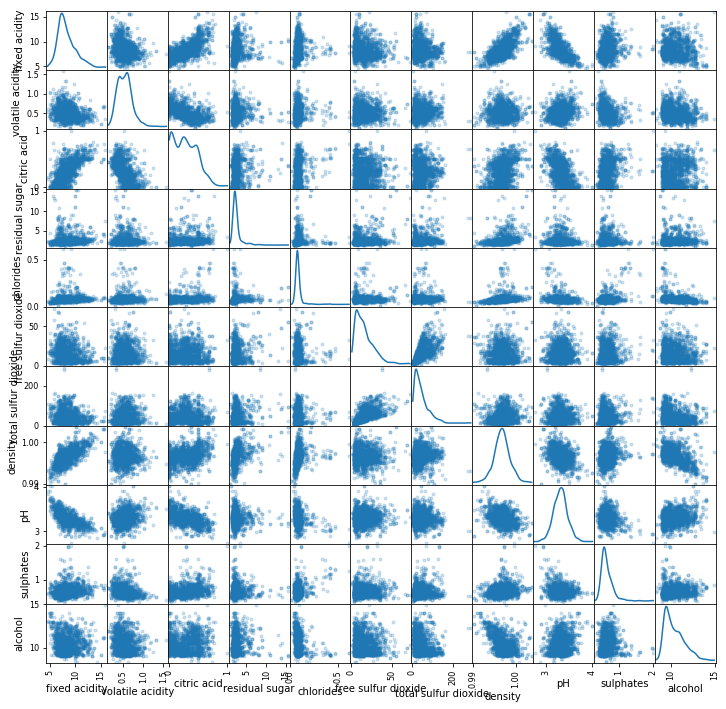

In [26]:
# Create a scatter matrix of the dataframe features
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

## Data Exploration
Here using Pandas we plot our data in lines.

Each line represents an instance from the dataset and the value of the instance for each of the features.  The color represents the category of quality.  This allows us to quickly glean much information that would traditionally come from summary statistics such as max and min, distribution of values for the features.  It also gives some insight to common trends of the various color categories.

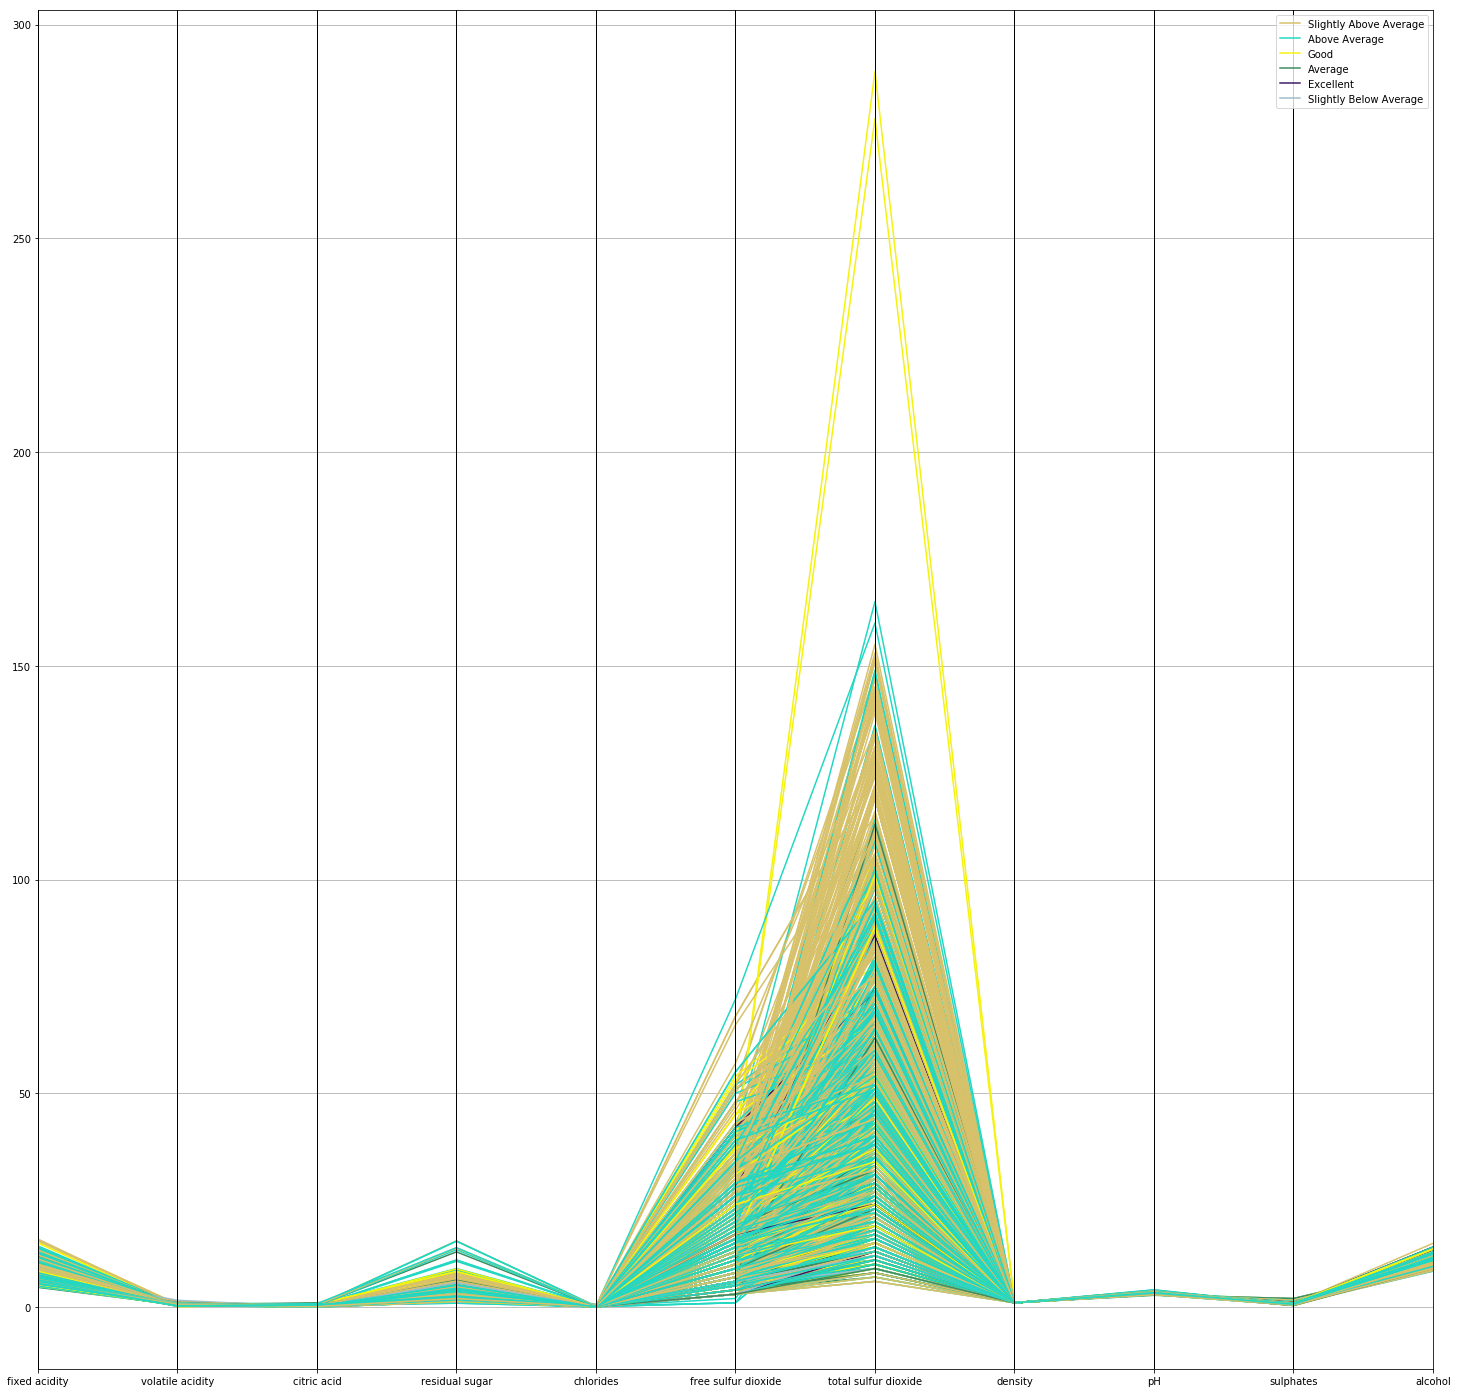

In [27]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(25,25))
parallel_coordinates(df, 'quality')
plt.show()

## Data Exploration
Here using Pandas we visualize our data to in a radial plot which normalizes our data and plots the instances relative to our features.

This is useful for us to look for clusters and trends happening in the multivariate layer of our dataset.  Similar to how a scatter plot shows the interplay of two features this reflects the interaction of a higher dimension of features.

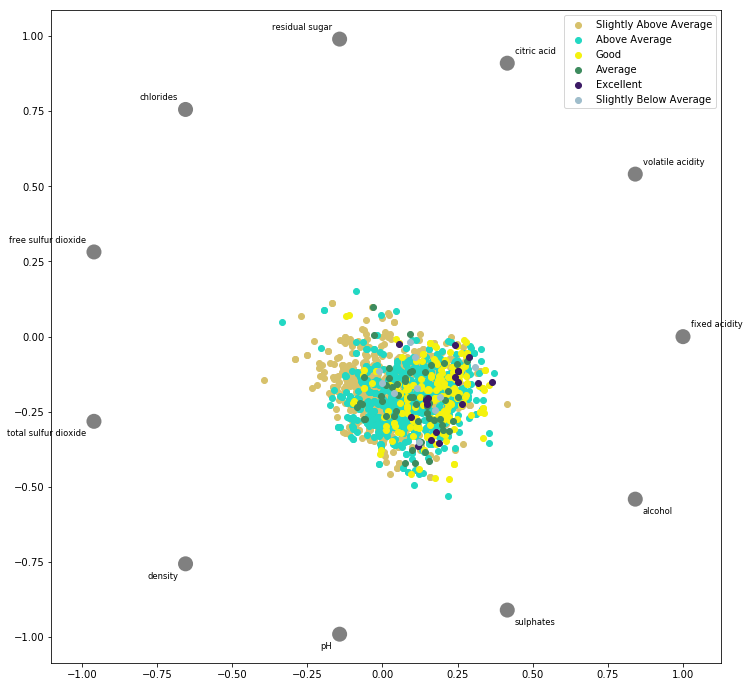

In [28]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'quality')
plt.show()

## Data Extraction
Here we are preparing our path and checking for existing files to drop our data into.

In [56]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join(".", "..", "MachineLearning", "data"))

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

- dataset.csv
- meta.json
- README.md
- WineQuality.txt


## Data Load
- Construct the paths and file names of the 'Bunch' files
- Load the features and labels
- Load the read me description
- Using Numpy load the data from the txt file
- Extract the data and wine quality
- Create a 'Bunch' which is an object that contains the data, description and structure of our data in a dictionary like maner

In [57]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the wine dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'WineQuality.txt'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the text file.
    dataset = np.loadtxt(filenames['data'], delimiter = ";")

    # Extract the target from the data
    data   = dataset[:, 0:-1]
    target = dataset[:, -1]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)

(1599, 11)
(1599,)


## Load the Algorithms!
- Metrics for evaluating performance
- Cross validation between 
- SVC algorithm
- K Neighbors Classifier
- Random Forest Classifier

In [58]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Define a function to evaluate the performance of the models 
- Set our start time
- Define an empty array for our score variable
- Define our training dataset and our test dataset
- e

In [59]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))

In [67]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "Wine Quality SVM Classifier")

/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Build and Validation of Wine Quality SVM Classifier took 2.790 seconds
Validation scores are as follows:

accuracy     0.577245
f1           0.553080
precision    0.555022
recall       0.577245
dtype: float64

Fitted model written to:
/Users/jchan/MachineLearning/wine-quality-svm-classifier.pickle


In [69]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Wine Quality kNN Classifier", n_neighbors=12)

Build and Validation of Wine Quality kNN Classifier took 0.115 seconds
Validation scores are as follows:

accuracy     0.507187
f1           0.477231
precision    0.474799
recall       0.507187
dtype: float64

Fitted model written to:
/Users/jchan/MachineLearning/wine-quality-knn-classifier.pickle


/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Wine Quality Random Forest Classifier")

/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/py

Build and Validation of Wine Quality Random Forest Classifier took 0.648 seconds
Validation scores are as follows:

accuracy     0.688587
f1           0.672094
precision    0.668632
recall       0.688587
dtype: float64

Fitted model written to:
/Users/jchan/MachineLearning/wine-quality-random-forest-classifier.pickle


/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jchan/anaconda/lib/py